# Freecodecamp - Sea Level Predictor Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Read data from file

In [3]:
df = pd.read_csv("epa-sea-level.csv")
df.head(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
5,1885,0.531496,-0.330709,1.393701,NaN
6,1886,0.437008,-0.381890,1.255906,NaN
7,1887,0.216535,-0.602362,1.035433,NaN
8,1888,0.299213,-0.519685,1.118110,NaN
9,1889,0.362205,-0.456693,1.181102,NaN


### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

#### Create a Scatter Plot

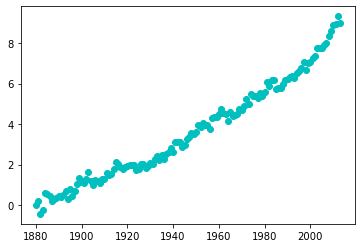

In [27]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color = 'c')
plt.show()

### Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

#### Create first line of best fit

In [5]:
line1 = linregress(df['Year'], y = df['CSIRO Adjusted Sea Level'])
slope, intercept, r_value, p_value, std_err = line1
years_extended = df['Year'].append(pd.Series(range(2014, 2050)), ignore_index=True)

#### Print years from 1875 to 2050

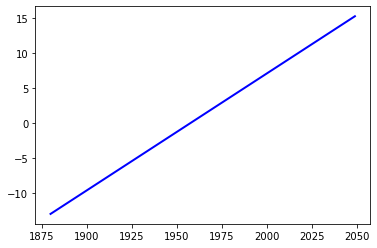

In [54]:
plt.plot(years_extended, years_extended*slope + intercept, color="blue", linewidth=2);

### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

#### Create second line of best fit from year 2000 to predict until 2050

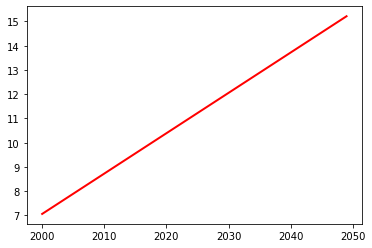

In [53]:
recent = df['Year']>=2000
line2 = linregress(df['Year'][recent], y = df['CSIRO Adjusted Sea Level'][recent])
slope, intercept, r_value, p_value, std_err = line2
years_reduced = years_extended[years_extended>=2000]
plt.plot(years_reduced, years_reduced*slope + intercept,color="r", linewidth=2)
#print(years_reduced*slope + intercept)
plt.show()

#### Add labels and title to the rise in sea level with the two lines of best fit

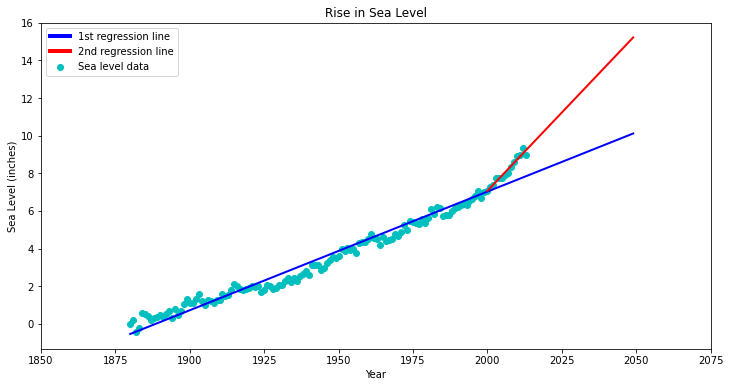

In [52]:
#Plotting the data
plt.figure(figsize=(12,6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color = 'c', label='Sea level data')

#Adding the first regression line
line1 = linregress(df['Year'], y = df['CSIRO Adjusted Sea Level'])
slope, intercept, r_value, p_value, std_err = line1
years_extended = df['Year'].append(pd.Series(range(2014, 2050)), ignore_index=True)
plt.plot(years_extended, years_extended*slope + intercept, color="blue", label='1st regression line', linewidth=2)


#Plotting the second regression line
line2 = linregress(df['Year'][recent], y = df['CSIRO Adjusted Sea Level'][recent])
slope, intercept, r_value, p_value, std_err = line2
years_reduced = years_extended[years_extended>=2000]
plt.plot(years_reduced, years_reduced*slope + intercept,color="red", label='2nd regression line',linewidth=2)

#Adding the labels to the new graph
leg = plt.legend()
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=4)
plt.title('Rise in Sea Level')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0]);

#Saving the plot
plt.savefig('sea_level_plot.png')